     pcost       dcost       gap    pres   dres
 0:  5.4639e+10 -3.1209e+13  7e+13  4e-01  3e-09
 1:  1.1654e+11 -2.9661e+12  6e+12  3e-02  1e-05
 2:  8.8495e+10 -1.2392e+11  2e+11  1e-04  7e-08
 3:  1.3376e+10 -1.4470e+10  3e+10  4e-12  4e-10
 4:  1.9181e+09 -2.1149e+09  4e+09  1e-13  2e-10
 5:  2.7488e+08 -3.0221e+08  6e+08  8e-13  6e-11
 6:  3.9389e+07 -4.3303e+07  8e+07  2e-13  2e-11
 7:  5.6439e+06 -6.2050e+06  1e+07  7e-13  1e-11
 8:  8.0855e+05 -8.8935e+05  2e+06  6e-14  4e-12
 9:  1.1578e+05 -1.2752e+05  2e+05  3e-14  1e-12
10:  1.6561e+04 -1.8304e+04  3e+04  1e-14  6e-13
11:  2.3615e+03 -2.6347e+03  5e+03  1e-14  2e-13
12:  3.3393e+02 -3.8200e+02  7e+02  7e-16  7e-14
13:  4.6102e+01 -5.6460e+01  1e+02  1e-15  2e-14
14:  5.8753e+00 -8.7829e+00  1e+01  4e-16  1e-14
15:  4.8265e-01 -1.5706e+00  2e+00  2e-16  4e-15
16: -1.6489e-01 -4.9857e-01  3e-01  2e-16  2e-15
17: -2.8661e-01 -5.5846e-01  3e-01  2e-16  1e-15
18: -4.4284e-01 -4.6485e-01  2e-02  2e-16  9e-16
19: -4.5405e-01 -4.55

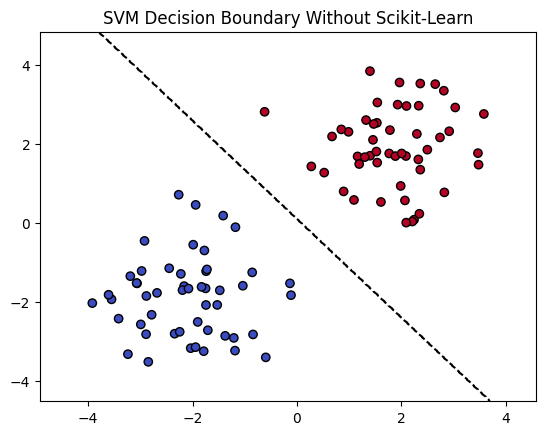

In [ ]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

class SVM:
    def __init__(self):
        self.w = None
        self.b = None
        self.support_vectors = None

    def fit(self, X, y):
        """
        Fit the SVM model using the training data (X, y).
        """
        n_samples, n_features = X.shape

        # Convert y to a column vector of -1 and 1
        y = y.reshape(-1, 1) * 1.0

        # Compute the Gram matrix
        K = np.dot(X, X.T)

        # Set up parameters for the quadratic optimization problem
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-1 * np.ones(n_samples))
        A = cvxopt.matrix(y.T, tc='d')
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
        h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * 1e6)))

        # Solve the quadratic optimization problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.array(solution['x']).flatten()

        # Select support vectors
        threshold = 1e-5
        support_indices = np.where(alphas > threshold)[0]
        self.support_vectors = X[support_indices]
        self.alphas = alphas[support_indices]
        self.y = y[support_indices]

        # Compute w and b
        self.w = np.sum(self.alphas[:, None] * self.y * self.support_vectors, axis=0)
        self.b = np.mean(self.y - np.dot(self.support_vectors, self.w))

    def predict(self, X):
        """
        Predict the labels for the input data X.
        """
        return np.sign(np.dot(X, self.w) + self.b)

# Generate synthetic dataset
np.random.seed(42)
X_class1 = np.random.randn(50, 2) + np.array([2, 2])
X_class2 = np.random.randn(50, 2) + np.array([-2, -2])
X = np.vstack((X_class1, X_class2))
y = np.hstack((np.ones(50), -1 * np.ones(50)))

# Train SVM
svm = SVM()
svm.fit(X, y)

# Predict
predictions = svm.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM Decision Boundary Without Scikit-Learn")

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--')
plt.show()

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



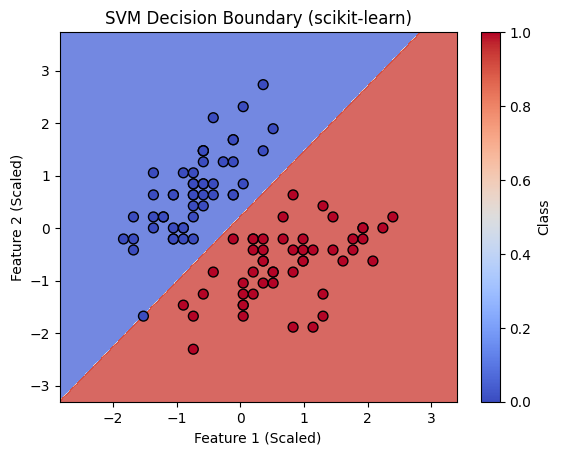

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load dataset (Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features for easy 2D visualization
y = iris.target

# Use only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Step 2: Preprocess the data (scale features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize decision boundaries
# Create a mesh grid for plotting
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title("SVM Decision Boundary (scikit-learn)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.colorbar(label="Class")
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# read data from csv file
data = pd.read_csv('/content/apples_and_oranges.csv')
#print(data)

# splitting data into training and test set
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)
#print("train:",training_set)
#print("test:",test_set)

# prepare data for applying it to svm
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target
#print(x_train,y_train)
#print(x_test,y_test)

# fitting the data (train a model)
classifier = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')
classifier.fit(x_train,y_train)

# perform prediction on x_test data
y_pred = classifier.predict(x_test)
#test_set['prediction']=y_pred
#print(y_pred)

# creating confusion matrix and accuracy calculation
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = float(cm.diagonal().sum())/len(y_test)
print('model accuracy is:',accuracy*100,'%')

[[3 0]
 [1 4]]
model accuracy is: 87.5 %


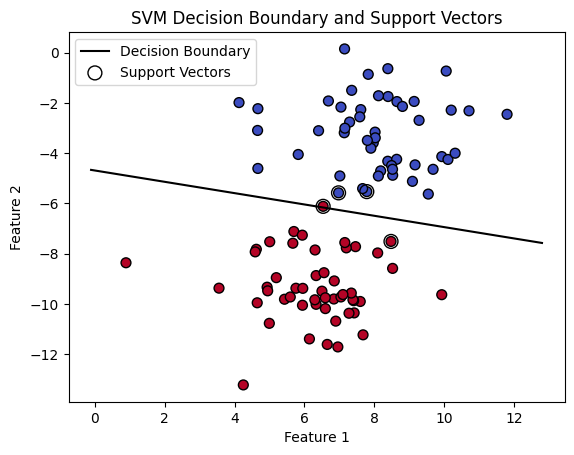

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Step 2: Fit the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Step 3: Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

# Step 4: Plot the decision boundary
# Get the separating hyperplane
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
yy = a * xx - (svm_model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, 'k-', label="Decision Boundary")

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")

# Step 5: Customize the plot
plt.title("SVM Decision Boundary and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
